# The team at FiveThirtyEight became interested in answering some questions about Star Wars fans. 
#### They wondered: does the rest of America realize that “The Empire Strikes Back” is clearly the best of the bunch?
#### The data survey done using the tool SurveyMonkey is in the GitHub repository:
# https://github.com/fivethirtyeight/data/tree/master/star-wars-survey

    The data has several columns, including the following:

    RespondentID — An anonymized ID for the respondent (person taking the survey)
    Gender — the respondent's gender
    Age — the respondent's age
    Household Income — the respondent's income
    Education — the respondent's education level
    Location (Census Region) — the respondent's location
    Have you seen any of the 6 films in the Star Wars franchise? — a Yes or No response
    Do you consider yourself to be a fan of the Star Wars film franchise? — a Yes or No response

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
star_wars = pd.read_csv("C://Users//johng//Desktop//data//star_wars.csv", encoding='ISO-8859-1')

####  The reason for ISO-8859-1 encoding is that some characters aren't in Python's default utf-8 encoding.

In [3]:
star_wars.columns

Index(['RespondentID',
       'Have you seen any of the 6 films in the Star Wars franchise?',
       'Do you consider yourself to be a fan of the Star Wars film franchise?',
       'Which of the following Star Wars films have you seen? Please select all that apply.',
       'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8',
       'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14',
       'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28', 'Which character shot first?',
       'Are you familiar with the Expan

In [4]:
star_wars["Have you seen any of the 6 films in the Star Wars franchise?"].value_counts(dropna=False)

Yes    936
No     250
Name: Have you seen any of the 6 films in the Star Wars franchise?, dtype: int64

In [5]:
star_wars["Do you consider yourself to be a fan of the Star Wars film franchise?"].value_counts()

Yes    552
No     284
Name: Do you consider yourself to be a fan of the Star Wars film franchise?, dtype: int64

#### Boolean values (True and False) instead of Yes or No are easier to analyze.

In [6]:
yes_no = {
    "Yes": True,
    "No": False
}
columns = [
    "Have you seen any of the 6 films in the Star Wars franchise?", 
    "Do you consider yourself to be a fan of the Star Wars film franchise?"
          ]

for c in columns:
    star_wars[c] = star_wars[c].map(yes_no)    

#### The unnamed columns are an answer to:
    Which of the following Star Wars films have you seen? Please select all that apply. -> Star Wars: Episode I The Phantom Menace
    Unnamed: 4 -> Star Wars: Episode II Attack of the Clones
    Unnamed: 5 -> Star Wars: Episode III Revenge of the Sith
    Unnamed: 6 -> Star Wars: Episode IV A New Hope
    Unnamed: 7 -> Star Wars: Episode V The Empire Strikes Back
    Unnamed: 8 -> Star Wars: Episode VI Return of the Jedi 
    
# If the value in a cell is the name of the movie, that means the respondent saw the movie.

In [7]:
movie_bool = {
    "Star Wars: Episode I  The Phantom Menace": True,
    "Star Wars: Episode II  Attack of the Clones": True,
    "Star Wars: Episode III  Revenge of the Sith": True,
    "Star Wars: Episode IV  A New Hope": True,
    "Star Wars: Episode V The Empire Strikes Back": True,
    "Star Wars: Episode VI Return of the Jedi": True,
    np.NaN: False
}

cols = [
    "Which of the following Star Wars films have you seen? Please select all that apply.",
    "Unnamed: 4",
    "Unnamed: 5",
    "Unnamed: 6",
    "Unnamed: 7",
    "Unnamed: 8"
]

for c in cols:
    star_wars[c] = star_wars[c].map(movie_bool)

#### Rename cols to seen_1, seen_2, seen_3, seen_4, seen_5, seen_6:

In [8]:
counter = 0

for c in cols:
    counter = counter + 1
    star_wars = star_wars.rename(columns={ c: "seen_{count}".format(count=counter)})

### The next six columns ask the respondent to rank the Star Wars movies in order from least to most favorite. 
### 1 means the film was the most favorite, and 6 means it was the least favorite. 
### Each of the following columns can contain the value 1, 2, 3, 4, 5, 6, or NaN.
    
    Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film -> How much the respondent liked Star Wars: Episode I The Phantom Menace
    Unnamed: 10 — How much the respondent liked Star Wars: Episode II Attack of the Clones
    Unnamed: 11 — How much the respondent liked Star Wars: Episode III Revenge of the Sith
    Unnamed: 12 — How much the respondent liked Star Wars: Episode IV A New Hope
    Unnamed: 13 — How much the respondent liked Star Wars: Episode V The Empire Strikes Back
    Unnamed: 14 — How much the respondent liked Star Wars: Episode VI Return of the Jedi
    
    We need to convert these columns to float type and rename them.

In [9]:
counter = 0
cols = [
    "Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.",
    "Unnamed: 10",
    "Unnamed: 11",
    "Unnamed: 12",
    "Unnamed: 13",
    "Unnamed: 14"
]

for c in cols:
    star_wars[c] = star_wars[c].astype(float)
    counter = counter + 1
    star_wars = star_wars.rename(columns={ c: "ranking_{count}".format(count=counter)})

In [10]:
star_wars.head()

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,seen_1,seen_2,seen_3,seen_4,seen_5,seen_6,ranking_1,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,3292879998,True,True,True,True,True,True,True,True,3.0,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
1,3292879538,False,NaN,False,False,False,False,False,False,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
2,3292765271,True,False,True,True,True,False,False,False,1.0,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
3,3292763116,True,True,True,True,True,True,True,True,5.0,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
4,3292731220,True,True,True,True,True,True,True,True,5.0,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


In [11]:
star_wars.describe()

,RespondentID,ranking_1,ranking_2,ranking_3,ranking_4,ranking_5,ranking_6
count,1.186000e+03,835.000000,836.000000,835.000000,836.000000,836.000000,836.000000
mean,3.290128e+09,3.732934,4.087321,4.341317,3.272727,2.513158,3.047847
std,1.055639e+06,1.656122,1.365365,1.400464,1.825901,1.578620,1.666897
min,3.288373e+09,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,3.289451e+09,3.000000,3.000000,3.000000,2.000000,1.000000,2.000000
50%,3.290147e+09,4.000000,4.000000,5.000000,3.000000,2.000000,3.000000
75%,3.290814e+09,5.000000,5.000000,6.000000,5.000000,3.000000,4.000000
max,3.292880e+09,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000


# The ranking mean show that the movie 5 had the lowest score, meaning that is was the best movie compared to the others. This movie is the empire strikes back.

In [12]:
rank_columns = star_wars.columns[9:15]

In [13]:
#find highest-ranked movie
means = star_wars[rank_columns].mean()
means

ranking_1    3.732934
ranking_2    4.087321
ranking_3    4.341317
ranking_4    3.272727
ranking_5    2.513158
ranking_6    3.047847
dtype: float64

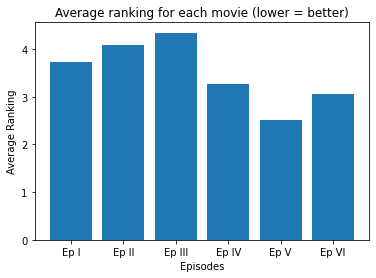

In [14]:
names = ['Ep I', 'Ep II', 'Ep III', 'Ep IV', 'Ep V', 'Ep VI']

plt.bar(names, means)
plt.title("Average ranking for each movie (lower = better)")
plt.xlabel("Episodes")
plt.ylabel("Average Ranking")
plt.show()

# How many people saw the movies?

In [15]:
seen_columns = star_wars.columns[3:9]

In [16]:
add = star_wars[seen_columns].sum()
add

seen_1    673
seen_2    571
seen_3    550
seen_4    607
seen_5    758
seen_6    738
dtype: int64

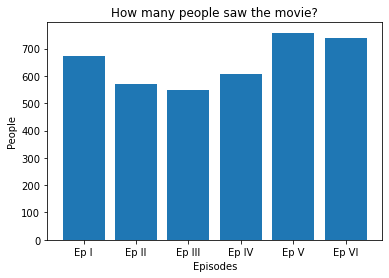

In [17]:
names = ['Ep I', 'Ep II', 'Ep III', 'Ep IV', 'Ep V', 'Ep VI']

plt.bar(names, add)
plt.title("How many people saw the movie?")
plt.xlabel("Episodes")
plt.ylabel("People")
plt.show()

# The most seen movie was fifth one.

## How many males and females saw the movie:

In [18]:
males = star_wars[star_wars["Gender"] == "Male"]
females = star_wars[star_wars["Gender"] == "Female"]

In [19]:
males_add = males[seen_columns].sum()
males_add

seen_1    361
seen_2    323
seen_3    317
seen_4    342
seen_5    392
seen_6    387
dtype: int64

In [20]:
females_add = females[seen_columns].sum()
females_add

seen_1    298
seen_2    237
seen_3    222
seen_4    255
seen_5    353
seen_6    338
dtype: int64

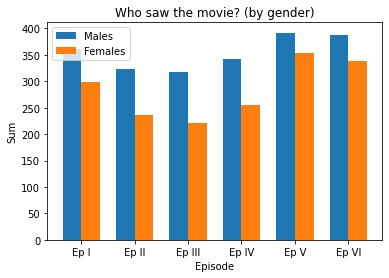

In [21]:
names = ['Ep I', 'Ep II', 'Ep III', 'Ep IV', 'Ep V', 'Ep VI']
ind = np.arange(len(names)) #number of bars to show

#plot bar chart
width = 0.35
plt.bar(ind, males_add, width, label="Males")
plt.bar(ind+width, females_add, width, label="Females")
plt.xticks(ind+width / 2, names)
plt.title("Who saw the movie? (by gender)")
plt.xlabel("Episode")
plt.ylabel("Sum")
plt.legend(loc="best")
plt.show()